In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from epg import *
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 4


In [9]:
TE = 5e-3
# angles = np.loadtxt('/Users/jtamir/scan-data/feet/synth_foot/sim_for_paper/flipmod/flipangles.txt.408183520')
# angles = np.loadtxt('/Users/jtamir/tmp/flipangles.txt.1028091647') # prostate Oct 28
angles = np.loadtxt('/Users/jtamir/projects/t2shuffling-support_git/data/footsim/flipangles.txt')
angles_rad = angles * np.pi / 180.
T = len(angles_rad)

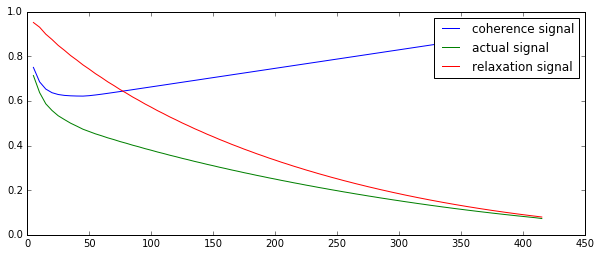

In [10]:
T1 = 1000e-3
T2 = 100e-3

S_coherence = np.real(FSE_signal(angles_rad, TE, 1000, 1000))
S_act = np.real(FSE_signal(angles_rad, TE, T1, T2))

S_relax = S_act / S_coherence

echo_times = (1 + np.arange(T)) * TE

plt.plot(echo_times*1000, S_coherence, echo_times*1000, S_act, echo_times*1000, S_relax)
plt.ylim((0,1))
plt.legend(('coherence signal', 'actual signal', 'relaxation signal'));

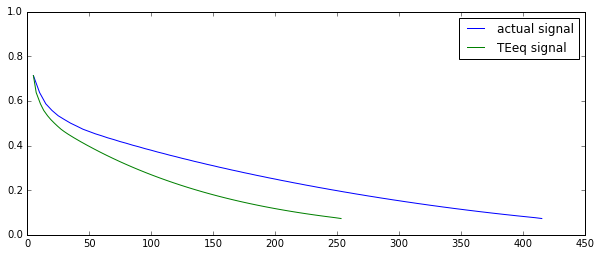

In [11]:
echo_times_eq = -T2 * np.log(S_act / S_coherence)
plt.plot(echo_times*1000, S_act, echo_times_eq*1000, S_act)
plt.ylim((0,1))
plt.legend(('actual signal', 'TEeq signal'));

In [21]:
echo_times_eq[:7]*1000

array([[  4.9995    ],
       [  7.24567904],
       [ 10.66380932],
       [ 13.34957923],
       [ 16.41531488],
       [ 19.02871832],
       [ 21.92692669]])

In [ ]:
np.savetxt('echo_times_eq.txt', echo_times_eq)